Title

Title

Introduction

Preliminary exploratory data analysis

In [22]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(ggplot2)
library(GGally)

In [25]:
cleveland_data <- read_csv("processed.cleveland.data", col_names = FALSE) %>%
    rename("age" = X1,
          "sex" = X2,
          "cp" = X3, 
          "trestbps" = X4,
          "chol" = X5, 
          "fbs" = X6,
          "restecg" = X7, 
          "thalach" = X8,
          "exang" = X9,
          "oldpeak" = X10,
          "slope" = X11,
          "ca" = X12,
          "thal" = X13,
          "num" = X14) %>%
    mutate(ca = as.double(ca), thal = as.double(thal), sex = as_factor(sex), num = as_factor(num)) %>%
    mutate(hasdisease = num != 0)

heart_disease_split <- initial_split(cleveland_data, prop = 0.75, strata = num) %>%
na.omit()
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)
heart_disease_train

heart_disease_train_true <- filter(heart_disease_train, hasdisease == TRUE)
heart_disease_train_true

heart_disease_train_false <- filter(heart_disease_train, hasdisease == FALSE)
heart_disease_train_false

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.double(ca)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.double(thal)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,hasdisease
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3,TRUE
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,FALSE
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2,TRUE
53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,TRUE
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0,FALSE


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,hasdisease
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,TRUE
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3,TRUE
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2,TRUE
53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,TRUE
48,1,2,110,229,0,0,168,0,1.0,3,0,7,1,TRUE
58,1,2,120,284,0,2,160,0,1.8,2,0,3,1,TRUE
60,1,4,130,206,0,2,132,1,2.4,2,2,7,4,TRUE
40,1,4,110,167,0,2,114,1,2.0,2,0,7,3,TRUE
60,1,4,117,230,1,0,160,1,1.4,1,2,7,2,TRUE


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,hasdisease
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,FALSE
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,FALSE
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0,FALSE
44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,FALSE
52,1,3,172,199,1,0,162,0,0.5,1,0,7,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0,FALSE


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing miss

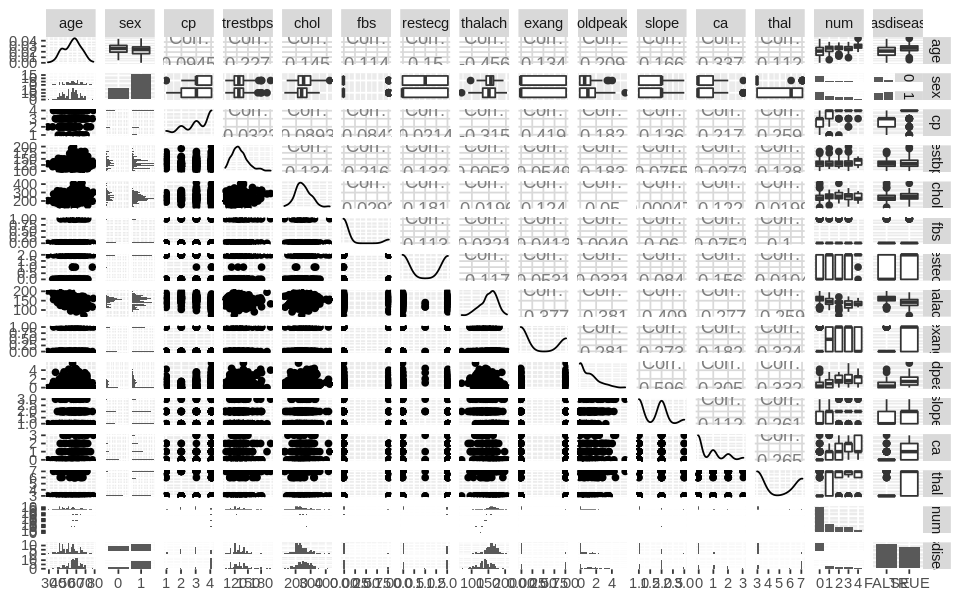

In [3]:
options(repr.plot.width = 8, repr.plot.height = 5)
a<-ggplot(heart_disease_train, aes(x=chol,y=age,color=factor(num))) +
     geom_point() +
     labs(x="trestbps", y="thalach",color="Heart Disease Level") +
     theme(text=element_text(size=18))
# a
b<-ggpairs(heart_disease_train)
b


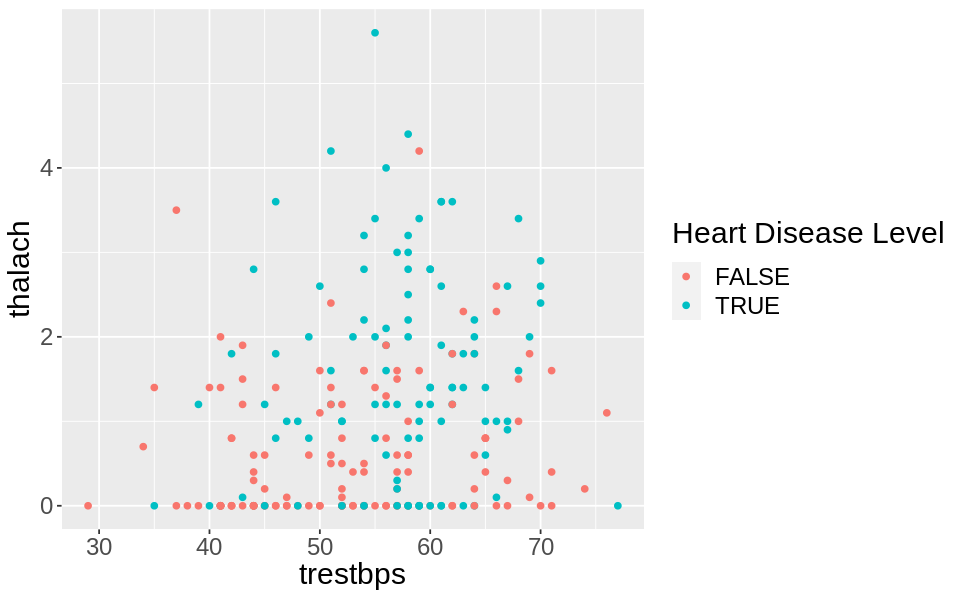

In [4]:
a<-ggplot(heart_disease_train, aes(x=age,y=oldpeak,color=factor(hasdisease))) +
     geom_point() +
     labs(x="trestbps", y="thalach",color="Heart Disease Level") +
     theme(text=element_text(size=18))
a

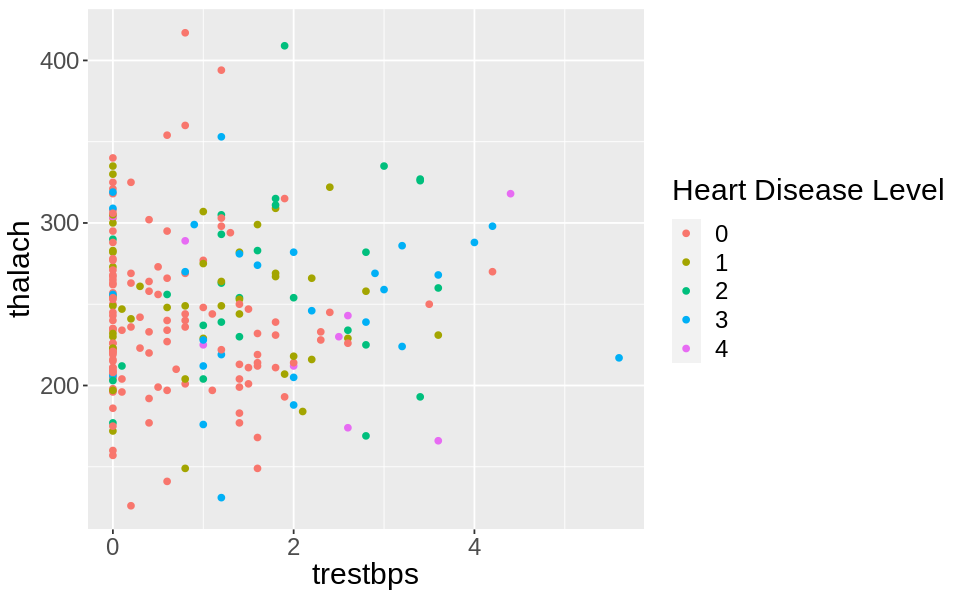

In [5]:
a<-ggplot(heart_disease_train, aes(x=oldpeak,y=chol,color=factor(num))) +
     geom_point() +
     labs(x="trestbps", y="thalach",color="Heart Disease Level") +
     theme(text=element_text(size=18))
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


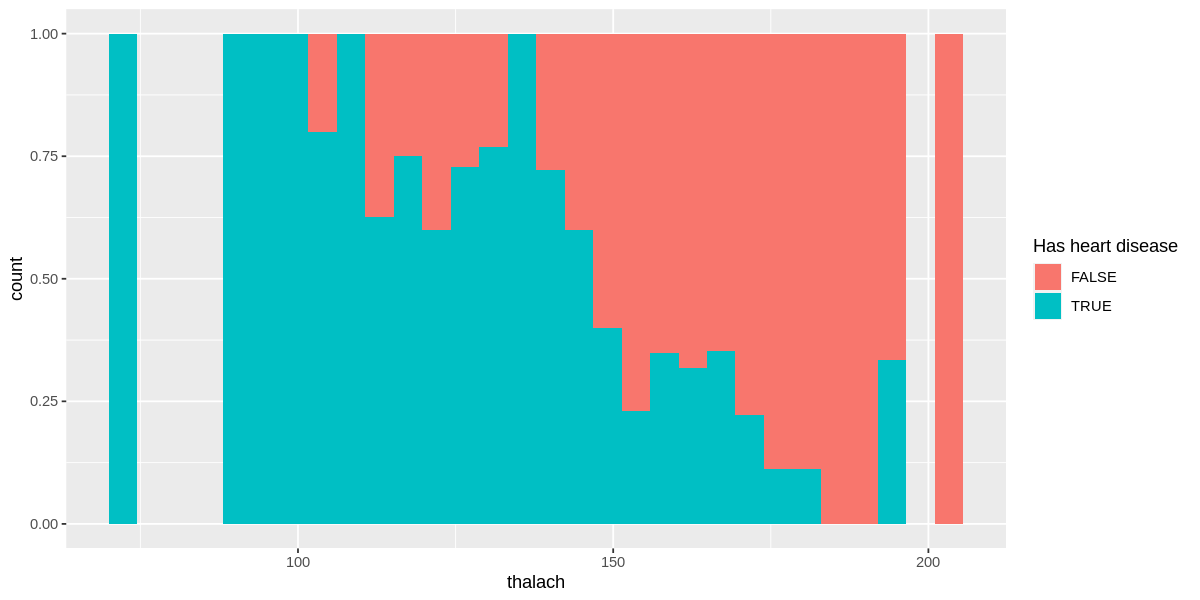

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=thalach,fill=hasdisease))+
    geom_histogram(position= "fill")+
    labs(x="thalach",fill="Has heart disease")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing missing values (geom_bar).”


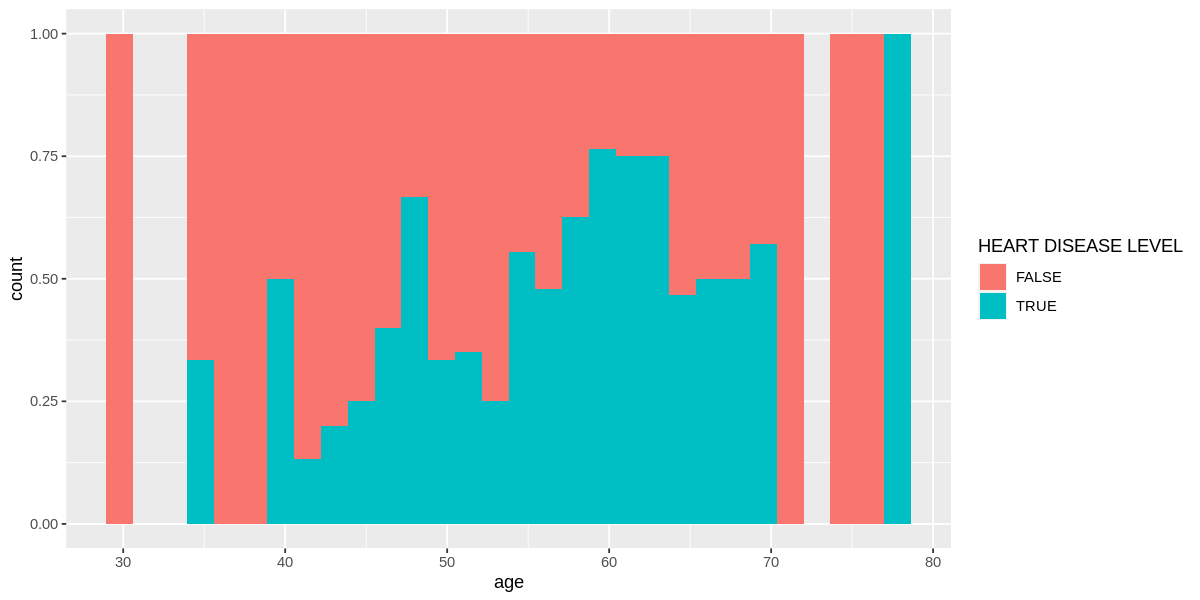

In [7]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=age,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="age",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing missing values (geom_bar).”


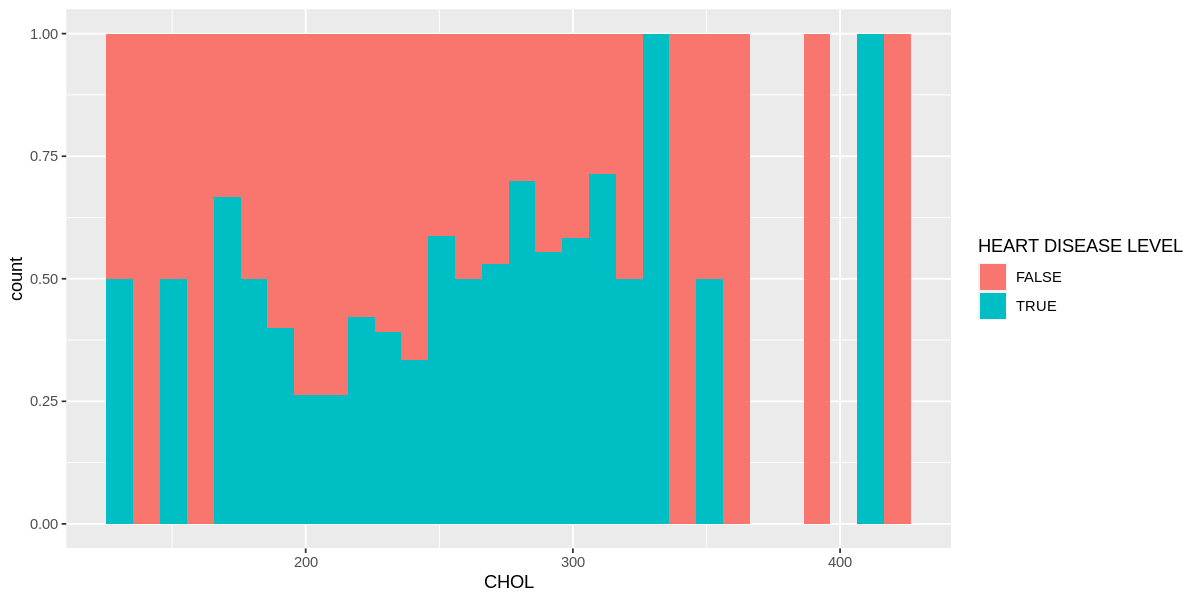

In [8]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=chol,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="CHOL",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 12 rows containing missing values (geom_bar).”


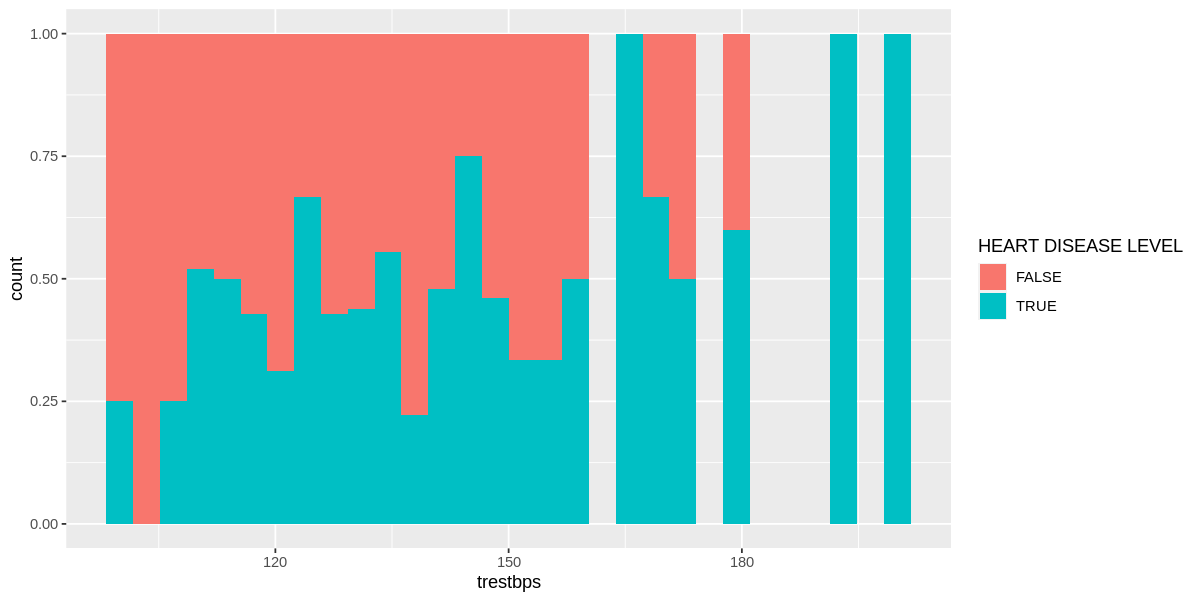

In [9]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=trestbps,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="trestbps",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 12 rows containing missing values (geom_bar).”


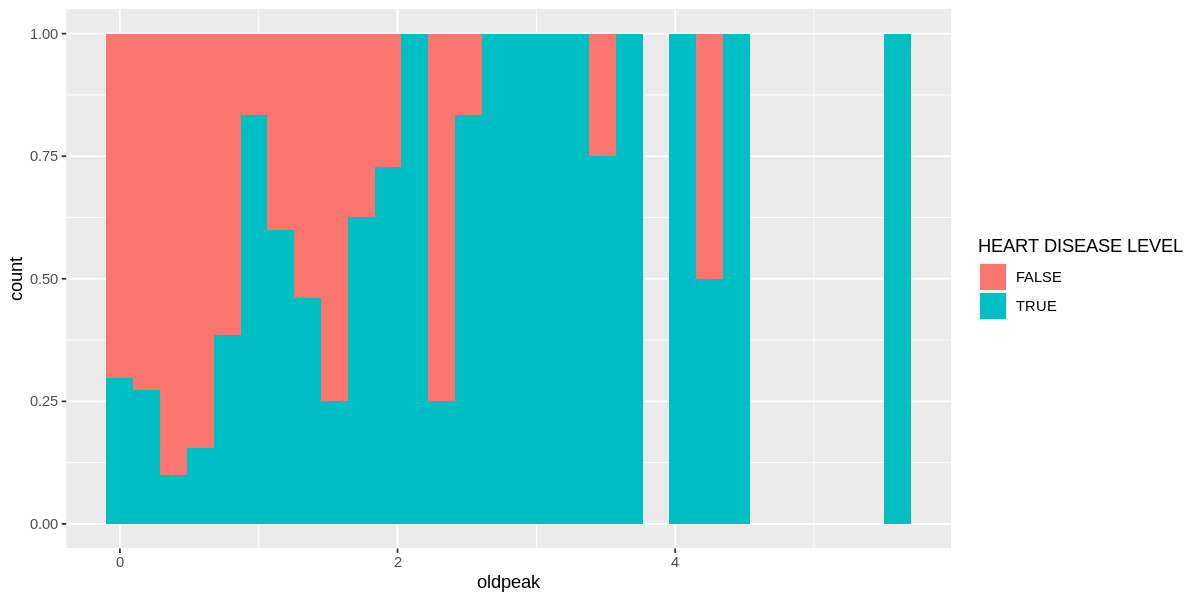

In [10]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=oldpeak,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="oldpeak",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 52 rows containing missing values (geom_bar).”


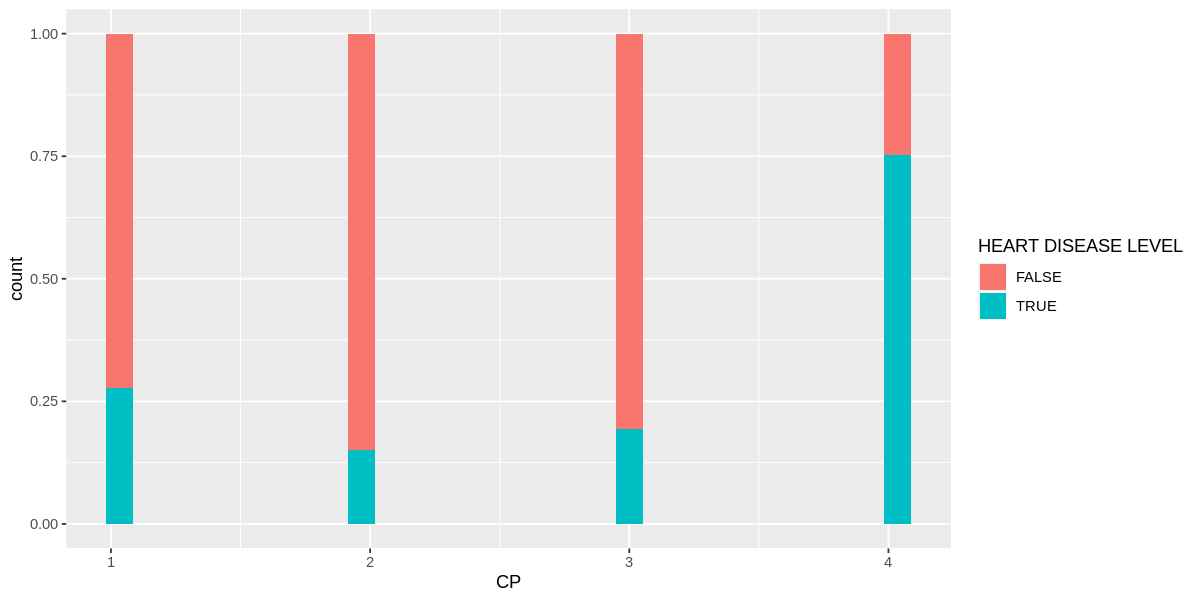

In [11]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=cp,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="CP",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 56 rows containing missing values (geom_bar).”


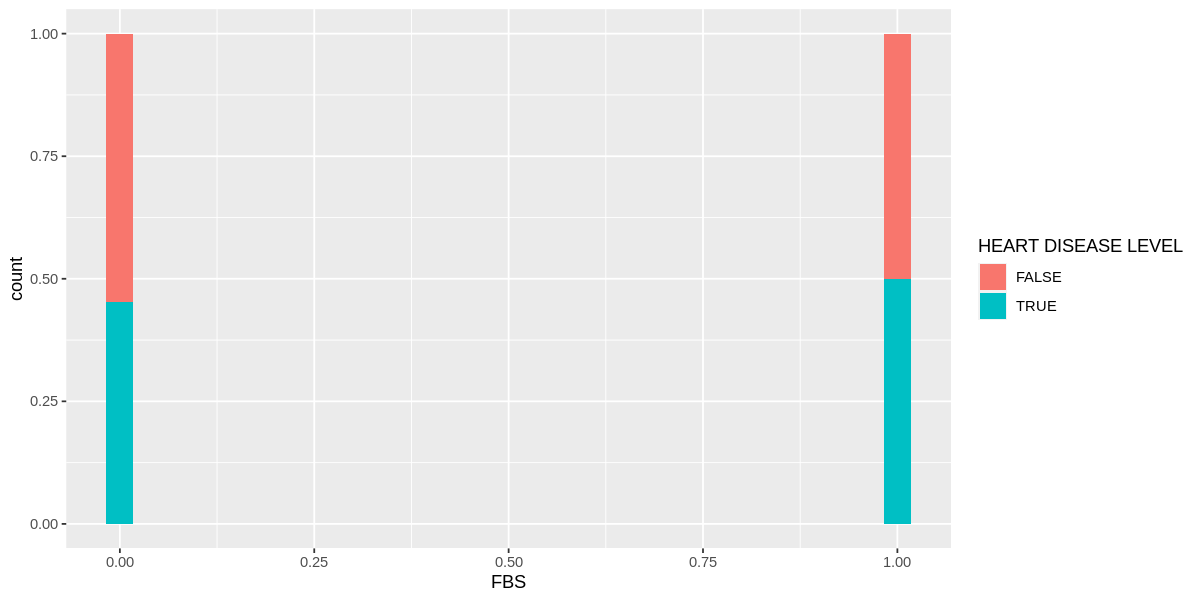

In [12]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=fbs,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="FBS",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 54 rows containing missing values (geom_bar).”


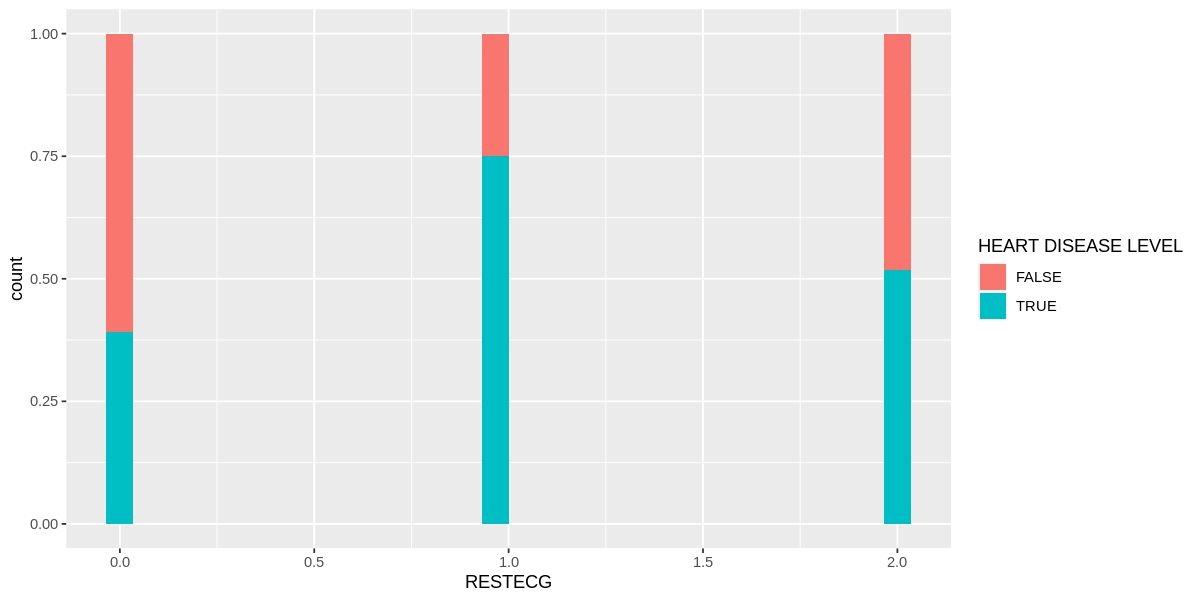

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=restecg,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="RESTECG",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 56 rows containing missing values (geom_bar).”


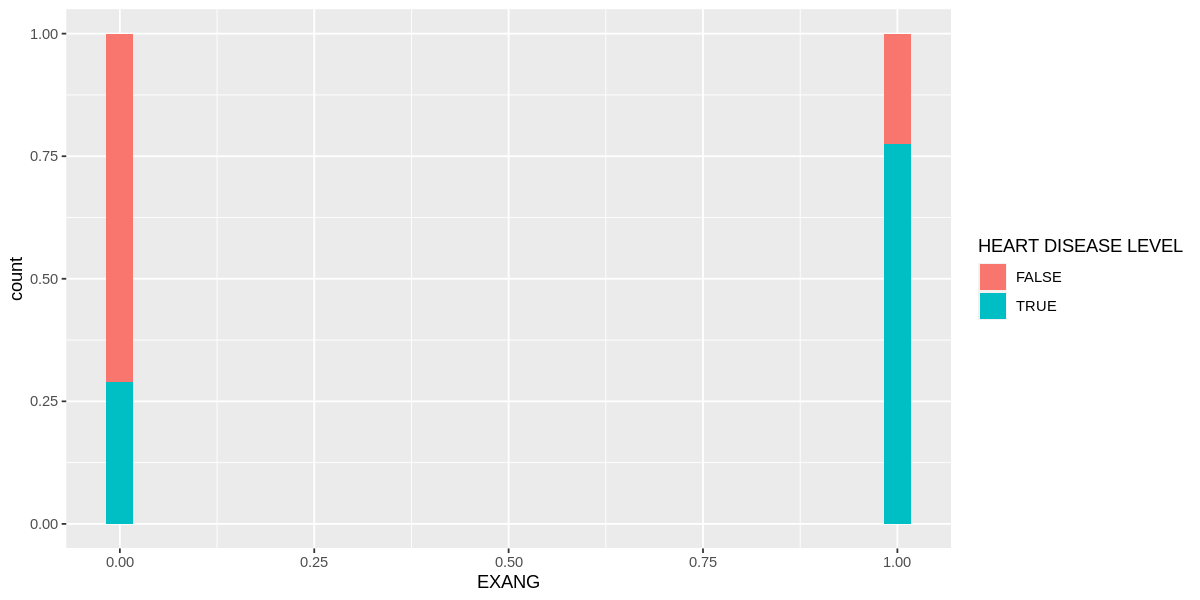

In [15]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=exang,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="EXANG",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 52 rows containing missing values (geom_bar).”


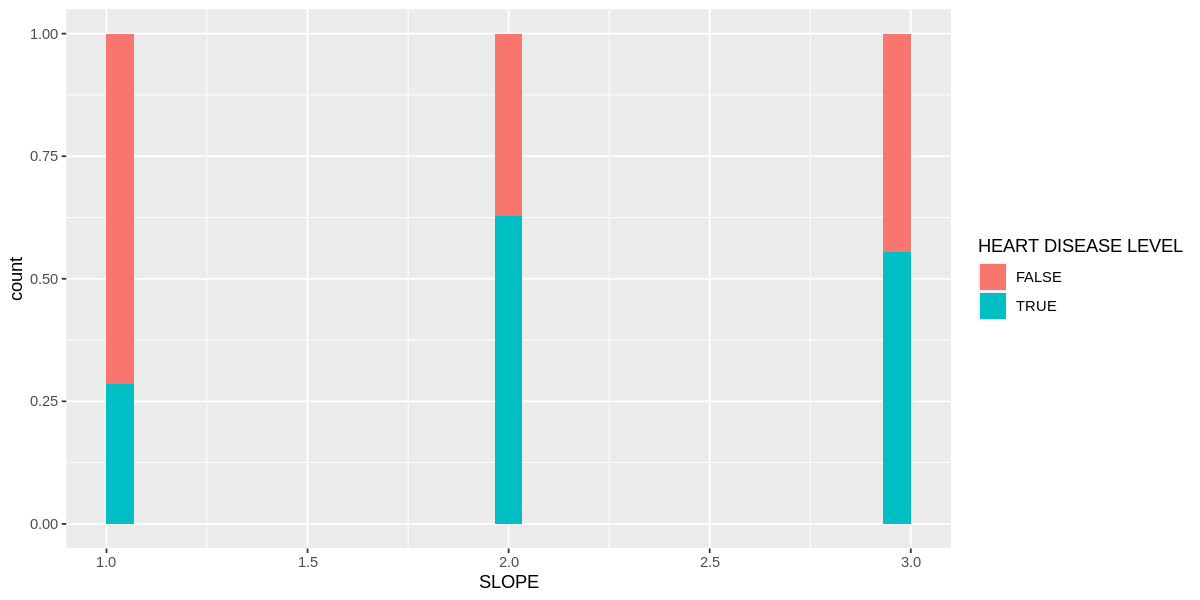

In [16]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=slope,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="SLOPE",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 52 rows containing missing values (geom_bar).”


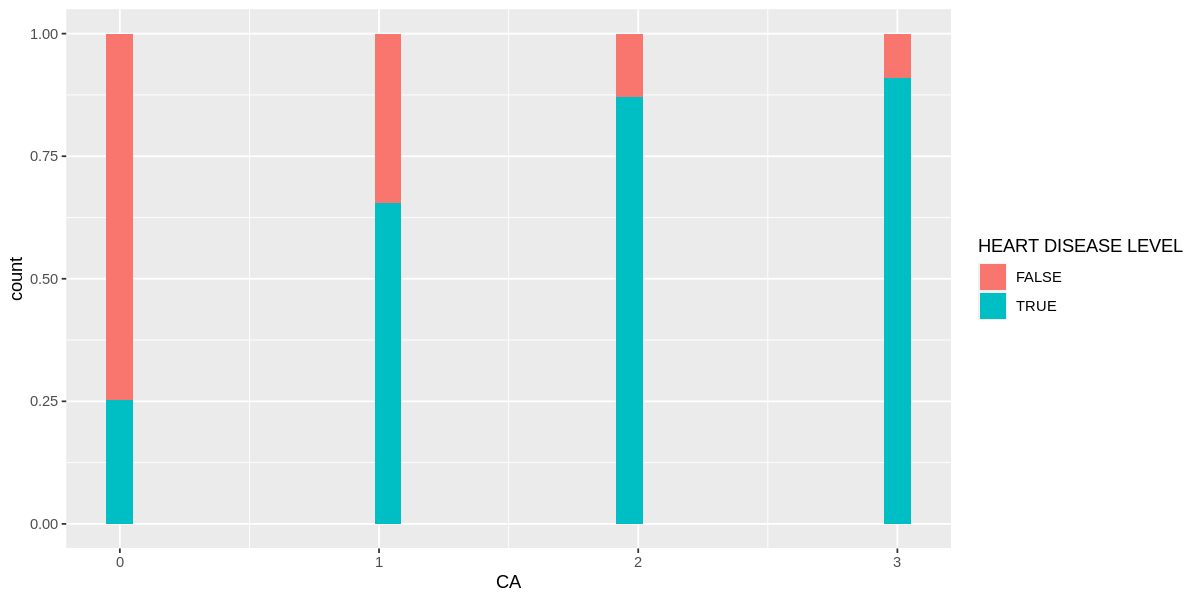

In [17]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=ca,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="CA",fill="HEART DISEASE LEVEL")
a

In [18]:
summary <- heart_disease_train %>% 
   group_by(num) %>% 
   summarise(n = n())
summary

`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
0,124
1,42
2,27
3,27
4,9


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 54 rows containing missing values (geom_bar).”


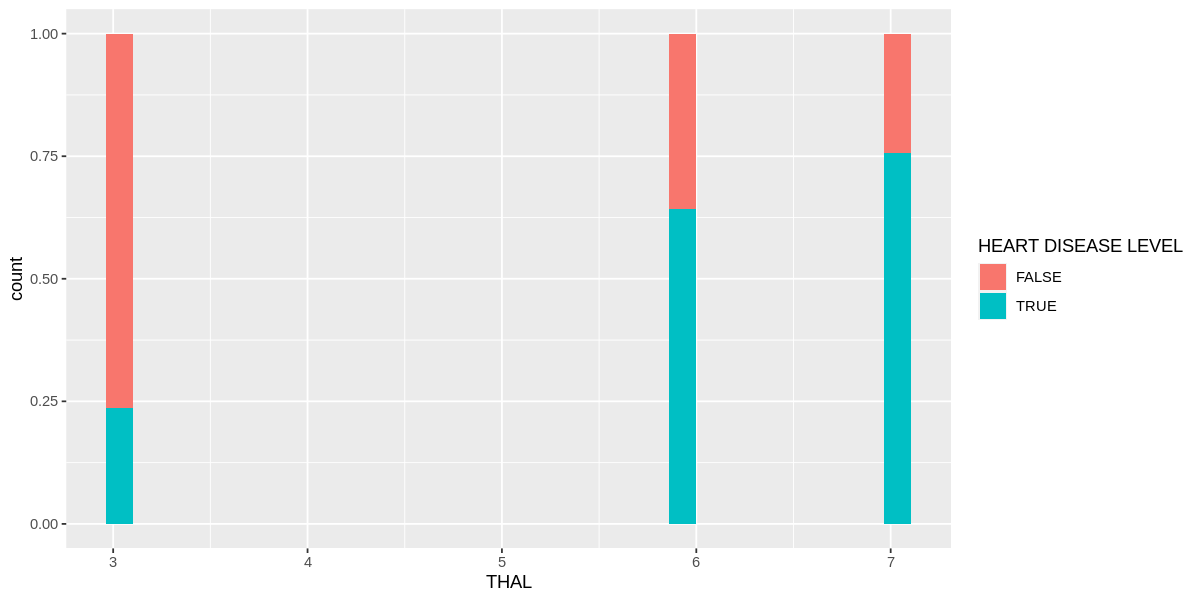

In [19]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=thal,fill=hasdisease))+
    geom_histogram(position="fill")+
    labs(x="THAL",fill="HEART DISEASE LEVEL")
a

Methods

Expected outcomes and significance